In [ ]:
! pip install pycaret[tuners]

In [1]:
import pandas as pd
df = pd.read_csv('../Data/train.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [42]:
df.Exited.value_counts('%')

Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64

In [3]:
column_types = df.dtypes

print(column_types)

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [48]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
18,18,15671358,Hargreaves,645,Germany,Female,55.0,8,120105.43,1,1.0,0.0,125083.29,1
19,19,15650670,Ts'ui,559,France,Male,61.0,1,153711.26,1,0.0,1.0,180890.40,1
23,23,15576044,Akabueze,554,Germany,Male,44.0,9,121823.26,1,1.0,0.0,79577.68,1
25,25,15671137,Sazonova,703,Spain,Male,39.0,9,0.00,1,1.0,0.0,131363.57,1


In [6]:
# Import necessary libraries
from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model, evaluate_model, finalize_model, predict_model, save_model, load_model

# Load your dataset
import pandas as pd

# Configuración del experimento
exp_clf101 = setup(data=df,
                   target='Exited',
                   session_id=123,
                   train_size=0.7,
                   log_experiment=True,
                   experiment_name='Bank_Churn',
                   ignore_features=['id','CustomerId','Surname'],
                   numeric_features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
                   categorical_features=['Geography', 'Gender'])

,Description,Value
0,Session id,123
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(165034, 14)"
4,Transformed data shape,"(165034, 13)"
5,Transformed train set shape,"(115523, 13)"
6,Transformed test set shape,"(49511, 13)"
7,Ignore features,3
8,Numeric features,8
9,Categorical features,2


2024/10/22 01:02:06 INFO mlflow.tracking.fluent: Experiment with name 'Bank_Churn' does not exist. Creating a new experiment.


In [ ]:
# no correr Comparación de modelos
best_model = compare_models()

In [7]:
# Creación de un modelo específico
rf_model = create_model('rf')  # Random Forest

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8612,0.8772,0.5501,0.7278,0.6266,0.5434,0.5514
1,0.8595,0.8719,0.5317,0.7312,0.6157,0.5323,0.5424
2,0.8543,0.8685,0.5268,0.7100,0.6048,0.5179,0.5266
3,0.8587,0.8738,0.5286,0.7291,0.6129,0.5292,0.5394
4,0.8611,0.8729,0.5409,0.7328,0.6224,0.5397,0.5490
5,0.8585,0.8736,0.5471,0.7169,0.6206,0.5355,0.5429
6,0.8601,0.8780,0.5307,0.7344,0.6162,0.5333,0.5438
7,0.8575,0.8714,0.5401,0.7166,0.6160,0.5306,0.5386
8,0.8557,0.8708,0.5288,0.7152,0.6080,0.5220,0.5310


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/22 01:03:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [8]:
# Optimización de hiperparámetros

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2]
}

# Perform Bayesian Search
tuned_dt = tune_model(rf_model, custom_grid=param_grid, search_library='scikit-learn', search_algorithm='grid')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8666,0.8910,0.5243,0.7723,0.6246,0.5471,0.5623
1,0.8657,0.8875,0.5190,0.7719,0.6207,0.5429,0.5587
2,0.8624,0.8817,0.5137,0.7580,0.6124,0.5324,0.5473
3,0.8655,0.8884,0.5176,0.7713,0.6195,0.5416,0.5575
4,0.8651,0.8843,0.5172,0.7698,0.6187,0.5406,0.5564
5,0.8612,0.8882,0.5139,0.7516,0.6104,0.5296,0.5438
6,0.8659,0.8951,0.5143,0.7764,0.6188,0.5414,0.5583
7,0.8651,0.8863,0.5200,0.7675,0.6200,0.5417,0.5568
8,0.8621,0.8830,0.5137,0.7566,0.6119,0.5318,0.5465


Fitting 10 folds for each of 2 candidates, totalling 20 fits


2024/10/22 01:08:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
# # Define the parameter grid for Random Search
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 15, 20]
# }

# # Perform Random Search
# tuned_model_random = tune_model(model, custom_grid=param_dist, search_library='scikit-learn', search_algorithm='random', n_iter=50)
# print(tuned_model_random)



# # Define the parameter grid for Bayesian Search
# param_grid_bayesian = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 15, 20]
# }

# # Perform Bayesian Search
# tuned_model_bayesian = tune_model(model, custom_grid=param_grid_bayesian, search_library='scikit-optimize', search_algorithm='bayesian')
# print(tuned_model_bayesian)

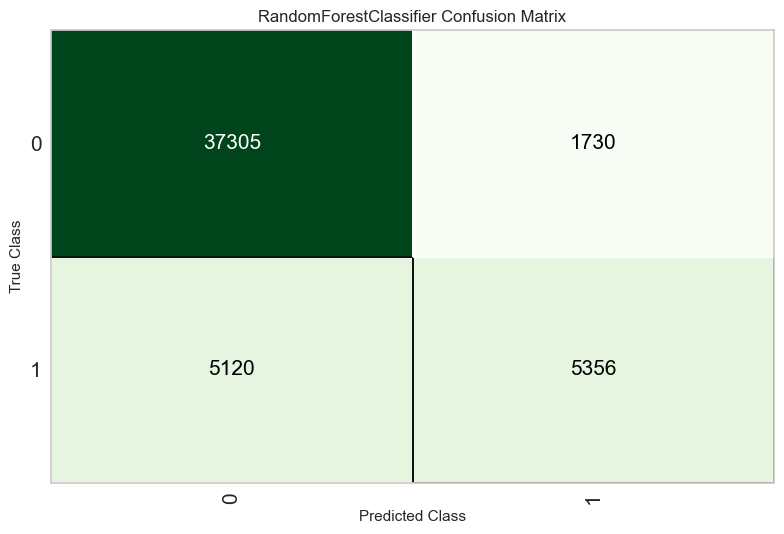

In [72]:
# Visualización del modelo
plot_model(tuned_dt, plot='confusion_matrix')

In [10]:
# Visualización exhaustiva del modelo
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [29]:
# Finalizar el modelo
final_dt = finalize_model(tuned_dt)

2024/10/22 02:12:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [30]:
df_test = pd.read_csv('../Data/test.csv')
column_types = df_test.dtypes
print(column_types)

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object


In [56]:
# Realizar predicciones
predictions = predict_model(final_dt, data=df_test)

In [59]:
predictions

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction_label,prediction_score
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.000000,2,1.0,0.0,181449.968750,0,0,0.9737
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.000000,2,1.0,1.0,49503.500000,0,0,0.9885
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.000000,2,1.0,0.0,184866.687500,0,0,0.9540
3,3,15741417,Kao,581,France,Male,34.0,2,148882.546875,1,1.0,1.0,84560.882812,0,0,0.9527
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.000000,2,1.0,1.0,15068.830078,0,0,0.9888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.000000,1,1.0,1.0,131834.750000,0,0,0.8390
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.000000,1,0.0,0.0,131834.453125,0,0,0.7404
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.000000,1,1.0,1.0,127429.562500,0,0,0.8900
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.000000,1,0.0,1.0,71173.031250,0,0,0.8856


In [33]:
# Create a DataFrame with 'id' and 'Exited' probabilities
result = pd.DataFrame({
    'id': df_test['id'],
    'Exited': predictions['prediction_score']
})

# Save the result to a CSV file
result.to_csv('predictions_1.csv', index=False)

In [34]:
# Guardar y cargar modelos
save_model(final_dt, 'final_dt_model_customer_churn')

# To load the model later
loaded_model = load_model('final_dt_model_customer_churn')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
